Luise Hauptmann

# EasyVisa Project

## Context:

Business communities in the United States are facing high demand for human resources, but one of the constant challenges is identifying and attracting the right talent, which is perhaps the most important element in remaining competitive. Companies in the United States look for hard-working, talented, and qualified individuals both locally as well as abroad.

The Immigration and Nationality Act (INA) of the US permits foreign workers to come to the United States to work on either a temporary or permanent basis. The act also protects US workers against adverse impacts on their wages or working conditions by ensuring US employers' compliance with statutory requirements when they hire foreign workers to fill workforce shortages. The immigration programs are administered by the Office of Foreign Labor Certification (OFLC).

OFLC processes job certification applications for employers seeking to bring foreign workers into the United States and grants certifications in those cases where employers can demonstrate that there are not sufficient US workers available to perform the work at wages that meet or exceed the wage paid for the occupation in the area of intended employment.

## Objective:

In FY 2016, the OFLC processed 775,979 employer applications for 1,699,957 positions for temporary and permanent labor certifications. This was a nine percent increase in the overall number of processed applications from the previous year. The process of reviewing every case is becoming a tedious task as the number of applicants is increasing every year.

The increasing number of applicants every year calls for a Machine Learning based solution that can help in shortlisting the candidates having higher chances of VISA approval. OFLC has hired your firm EasyVisa for data-driven solutions. You as a data scientist have to analyze the data provided and, with the help of a classification model:

* Facilitate the process of visa approvals.
* Recommend a suitable profile for the applicants for whom the visa should be certified or denied based on the drivers that significantly influence the case status. 


## Data Description

The data contains the different attributes of the employee and the employer. The detailed data dictionary is given below.

* case_id: ID of each visa application
* continent: Information of continent the employee
* education_of_employee: Information of education of the employee
* has_job_experience: Does the employee has any job experience? Y= Yes; N = No
* requires_job_training: Does the employee require any job training? Y = Yes; N = No 
* no_of_employees: Number of employees in the employer's company
* yr_of_estab: Year in which the employer's company was established
* region_of_employment: Information of foreign worker's intended region of employment in the US.
* prevailing_wage:  Average wage paid to similarly employed workers in a specific occupation in the area of intended employment. The purpose of the prevailing wage is to ensure that the foreign worker is not underpaid compared to other workers offering the same or similar service in the same area of employment. 
* unit_of_wage: Unit of prevailing wage. Values include Hourly, Weekly, Monthly, and Yearly.
* full_time_position: Is the position of work full-time? Y = Full Time Position; N = Part Time Position
* case_status:  Flag indicating if the Visa was certified or denied

___
## Importing necessary libraries and data

In [1]:
# this will help in making the Python code more structured automatically
%load_ext nb_black

import warnings

warnings.filterwarnings("ignore")

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Library to split data
from sklearn.model_selection import train_test_split

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 100)


# Libraries different ensemble classifiers
from sklearn.ensemble import (
    BaggingClassifier,
    RandomForestClassifier,
    AdaBoostClassifier,
    GradientBoostingClassifier,
    StackingClassifier,
)

from xgboost import XGBClassifier, XGBRegressor
from sklearn.tree import DecisionTreeClassifier

# Libraries to get different metric scores
from sklearn import metrics
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    make_scorer,
)

# To tune different models
from sklearn.model_selection import GridSearchCV


<IPython.core.display.Javascript object>

In [2]:
# read the csv file
df = pd.read_csv("EasyVisa.csv")

<IPython.core.display.Javascript object>

In [3]:
# make a copy of the csv file
data = df.copy()

<IPython.core.display.Javascript object>


___
## Data Overview

- Observations
- Sanity checks

In [4]:
# recall first 5 rows of dataset
data.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


<IPython.core.display.Javascript object>

In [5]:
data.tail()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.57,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.79,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.85,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.77,Year,Y,Certified
25479,EZYV25480,Asia,Bachelor's,Y,N,3195,1960,Midwest,70876.91,Year,Y,Certified


<IPython.core.display.Javascript object>

In [6]:
# understanding the shape of the dataset
print("The data has", data.shape[0], "rows and", data.shape[1], "columns")

The data has 25480 rows and 12 columns


<IPython.core.display.Javascript object>

In [7]:
# get info on data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


<IPython.core.display.Javascript object>

Observations:
- 9/12 values are categorical.
- 3/12 values are numeric. 

### Convert columns with an object datatype into categorical variables. 

In [8]:
# Looping through all columns in the dataframe
for feature in data.columns:
    if (
        data[feature].dtype == "object"
    ):  # Only apply for columns with categorical strings
        data[feature] = pd.Categorical(data[feature])  # Replace strings with an integer

<IPython.core.display.Javascript object>

In [9]:
# checking the data types of the columns after conversion
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   case_id                25480 non-null  category
 1   continent              25480 non-null  category
 2   education_of_employee  25480 non-null  category
 3   has_job_experience     25480 non-null  category
 4   requires_job_training  25480 non-null  category
 5   no_of_employees        25480 non-null  int64   
 6   yr_of_estab            25480 non-null  int64   
 7   region_of_employment   25480 non-null  category
 8   prevailing_wage        25480 non-null  float64 
 9   unit_of_wage           25480 non-null  category
 10  full_time_position     25480 non-null  category
 11  case_status            25480 non-null  category
dtypes: category(9), float64(1), int64(2)
memory usage: 2.0 MB


<IPython.core.display.Javascript object>

- All object datatypes have been converted to category. 
___

In [10]:
# check for duplicate values
data.duplicated().sum()

0

<IPython.core.display.Javascript object>

- There are no duplicated values in the dataset. 

In [11]:
# check for missing values
data.isnull().sum()

case_id                  0
continent                0
education_of_employee    0
has_job_experience       0
requires_job_training    0
no_of_employees          0
yr_of_estab              0
region_of_employment     0
prevailing_wage          0
unit_of_wage             0
full_time_position       0
case_status              0
dtype: int64

<IPython.core.display.Javascript object>

- There are no null values in the dataset. 

In [12]:
# check statistical summary of the data
data.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_employees,25480.0,5667.043210,22877.928848,-26.0000,1022.00,2109.00,3504.0000,602069.00
yr_of_estab,25480.0,1979.409929,42.366929,1800.0000,1976.00,1997.00,2005.0000,2016.00
prevailing_wage,25480.0,74455.814592,52815.942327,2.1367,34015.48,70308.21,107735.5125,319210.27


<IPython.core.display.Javascript object>

- The three numerical variables all return on the statistical summary.
- The median number of employees is 2109.
- The median year of establishment is 1997.
- The median prevailing wage is 70,308.21
- no_of_employees has a negative value, which is a mistake in the data. I will fix this in the data preparation stage.

In [13]:
# dropping the columns with all unique values
data.case_id.nunique()

25480

<IPython.core.display.Javascript object>

In [14]:
# drop case ID
data = data.drop(["case_id"], axis=1)

<IPython.core.display.Javascript object>

In [15]:
# check column drop
data.head()

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


<IPython.core.display.Javascript object>

In [16]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_employees,25480.0,5667.043210,22877.928848,-26.0000,1022.00,2109.00,3504.0000,602069.00
yr_of_estab,25480.0,1979.409929,42.366929,1800.0000,1976.00,1997.00,2005.0000,2016.00
prevailing_wage,25480.0,74455.814592,52815.942327,2.1367,34015.48,70308.21,107735.5125,319210.27


<IPython.core.display.Javascript object>

In [17]:
# understanding the shape of the dataset after removing case_id
print("The data has", data.shape[0], "rows and", data.shape[1], "columns")

The data has 25480 rows and 11 columns


<IPython.core.display.Javascript object>

___
## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

Functions required for the EDA:

In [18]:
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

<IPython.core.display.Javascript object>

In [19]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

<IPython.core.display.Javascript object>

In [20]:
# function to plot stacked bar chart


def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

<IPython.core.display.Javascript object>

**Leading Questions**:
1. Those with higher education may want to travel abroad for a well-paid job. Does education play a role in Visa certification? 

2. How does the visa status vary across different continents? 
 
3. Experienced professionals might look abroad for opportunities to improve their lifestyles and career development. Does work experience influence visa status? 
 
4. In the United States, employees are paid at different intervals. Which pay unit is most likely to be certified for a visa? 
 
5. The US government has established a prevailing wage to protect local talent and foreign workers. How does the visa status change with the prevailing wage?

___
### Univariate Analysis

#### `continent`

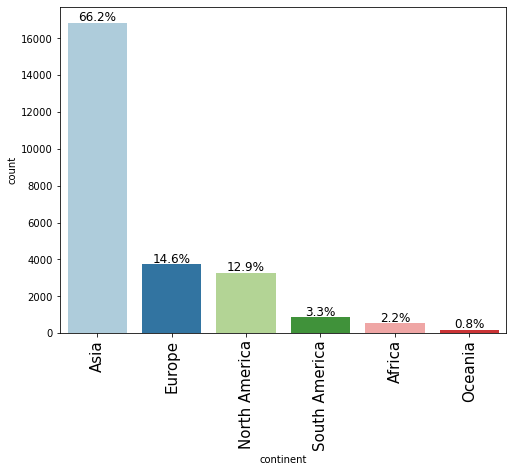

<IPython.core.display.Javascript object>

In [21]:
labeled_barplot(data, "continent", perc=True)
plt.show()

Observations:
- 66.2% of applicants are from Asia.
- 14.6% of applicants are from Europe. 
- 12.9% of applicants are from North America. 
- 3.3% of applicants are from South America. 
- 2.2% of applicants are from Africa. 
- 0.8% of applicants are from Oceania. 

#### `education_of_employee`

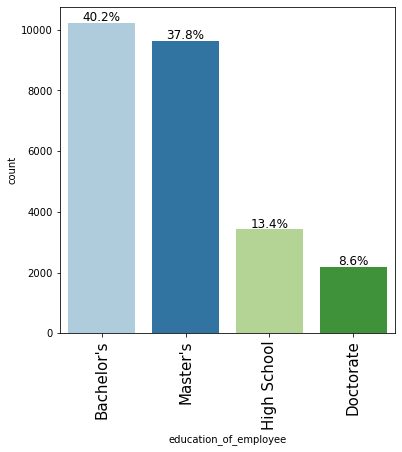

<IPython.core.display.Javascript object>

In [22]:
labeled_barplot(data, "education_of_employee", perc=True)
plt.show()

Observations:
- 40.2% of applicants have a Bachelor's degree, followed by 37.8% of applicants with a Master's. 

#### `has_job_experience`

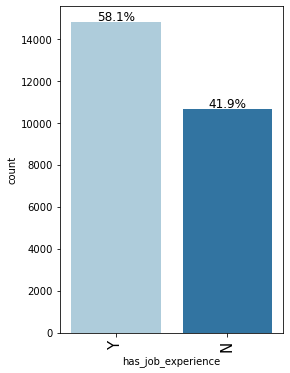

<IPython.core.display.Javascript object>

In [23]:
labeled_barplot(data, "has_job_experience", perc=True)
plt.show()

Observations:
- 58% of applicants have job experience. 
- 42% of applicants have no experience. 

#### `requires_job_training`

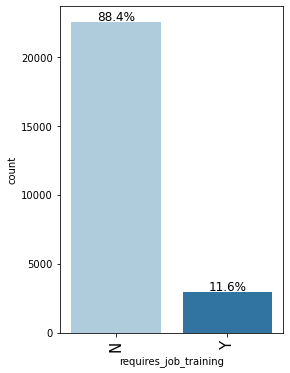

<IPython.core.display.Javascript object>

In [24]:
labeled_barplot(data, "requires_job_training", perc=True)
plt.show()

Observations:
- A vast majority of applicants do not require job training. 

#### `no_of_employees`

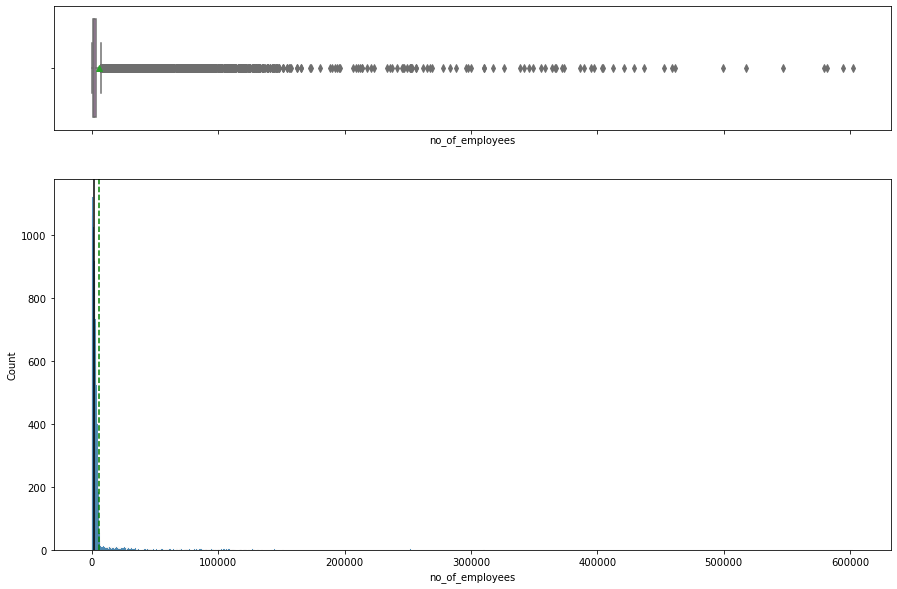

<IPython.core.display.Javascript object>

In [25]:
histogram_boxplot(data, "no_of_employees")
plt.show()

Observations:
- A vast majority of companies have less than 100,000 employees. 

#### `yr_of_estab`

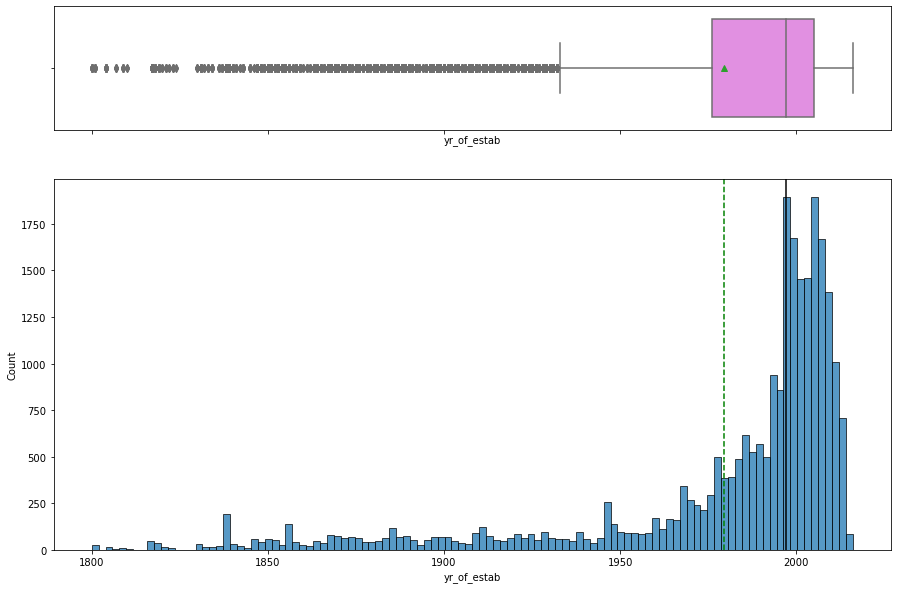

<IPython.core.display.Javascript object>

In [26]:
histogram_boxplot(data, "yr_of_estab")
plt.show()

Observations:
- The median year of establishment is 1997. Some companies are very old while others are quite young. 
- The graph is heavily skewed to the left. 

#### `region_of_employment`

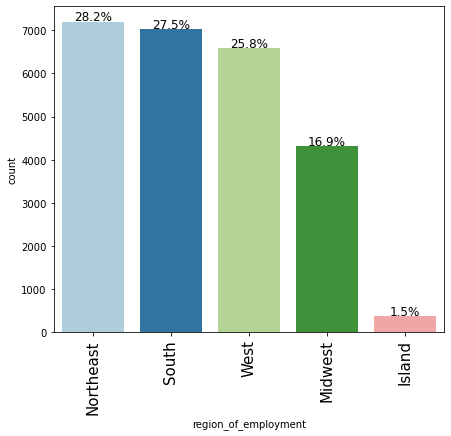

<IPython.core.display.Javascript object>

In [27]:
labeled_barplot(data, "region_of_employment", perc=True)
plt.show()

Observations:
- The Northeast is the most popular region of employment, followed by the South and the West. 

#### `prevailing_wage`

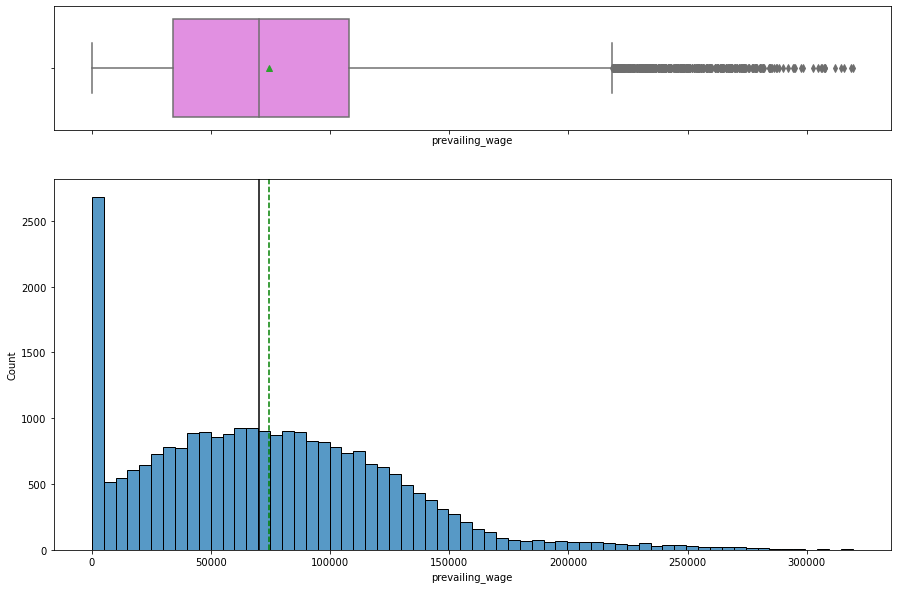

<IPython.core.display.Javascript object>

In [28]:
histogram_boxplot(data, "prevailing_wage")
plt.show()

Observations:
- Most applicants make between 50,000 and 100,000 dollars. 

#### `unit_of_wage`

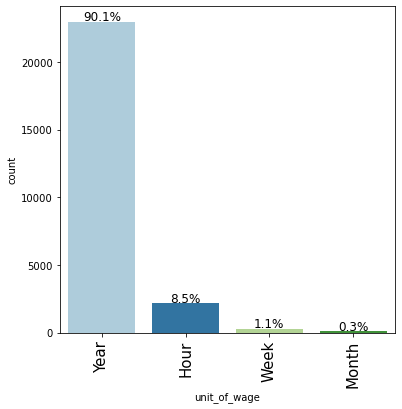

<IPython.core.display.Javascript object>

In [29]:
labeled_barplot(data, "unit_of_wage", perc=True)
plt.show()

Observations:
- Most applicants earn a salary as opposed to an hourly wage. 

#### `full_time_position`

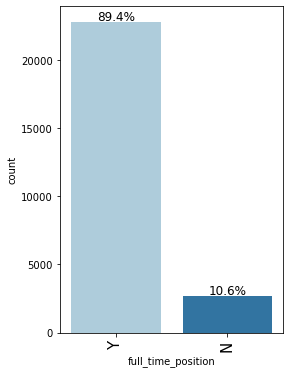

<IPython.core.display.Javascript object>

In [30]:
labeled_barplot(data, "full_time_position", perc=True)
plt.show()

Observations:
- Nearly 90% of all applicants accept a full time position. 

#### `case_status`

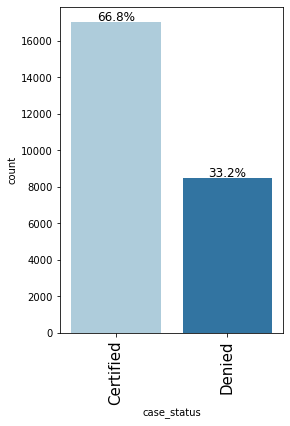

<IPython.core.display.Javascript object>

In [31]:
labeled_barplot(data, "case_status", perc=True)
plt.show()

Observations:
- 67% of applicants are offered a visa while 33% of applicants are denied. 

___
### Multivariate Analysis

In [32]:
### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

<IPython.core.display.Javascript object>

#### `Correlation`

In [33]:
# creating cols_list that contain columns of numerical data
cols_list = data.select_dtypes(include=np.number).columns.tolist()

<IPython.core.display.Javascript object>

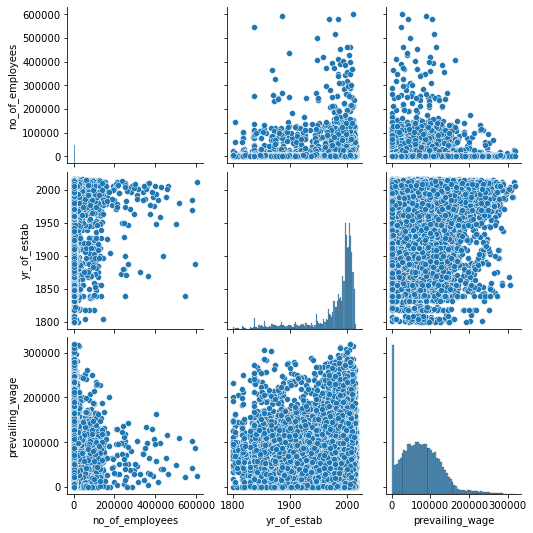

<IPython.core.display.Javascript object>

In [34]:
# correlation of numerical variables
sns.pairplot(data)

In [35]:
# correlation of numerical variables using a matrix
correlation = data.corr()
correlation

,no_of_employees,yr_of_estab,prevailing_wage
no_of_employees,1.000000,-0.017770,-0.009523
yr_of_estab,-0.017770,1.000000,0.012342
prevailing_wage,-0.009523,0.012342,1.000000


<IPython.core.display.Javascript object>

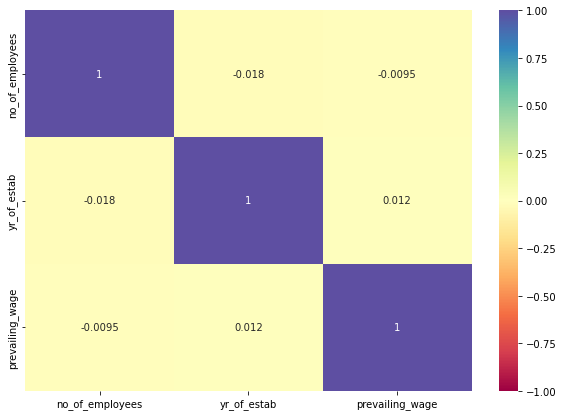

<IPython.core.display.Javascript object>

In [36]:
# heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(data.corr(), annot=True, cmap="Spectral", vmin=-1, vmax=1)
plt.show()

Observations:
- The numerical variables do not show significant correlation with one another.

#### `requires_job_training` vs `case_status`

case_status            Certified  Denied    All
requires_job_training                          
All                        17018    8462  25480
N                          15012    7513  22525
Y                           2006     949   2955
------------------------------------------------------------------------------------------------------------------------


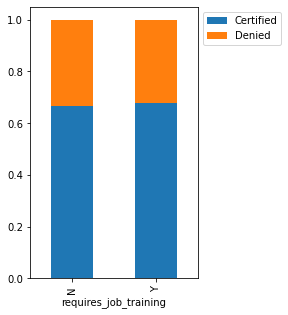

<IPython.core.display.Javascript object>

In [37]:
stacked_barplot(data, "requires_job_training", "case_status")

Observations:
- `requires_job_training` does not seem to heavily influence if visas were certified or denied. 

#### `continent` vs `prevailing_wage`

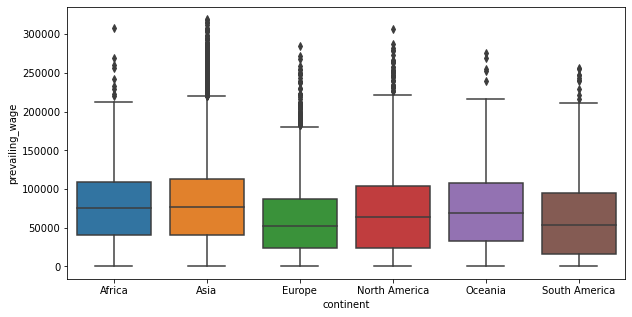

<IPython.core.display.Javascript object>

In [38]:
# boxplot for continent and prevailing wage
plt.figure(figsize=(10, 5))
sns.boxplot(data=data, x="continent", y="prevailing_wage")
plt.show()

Observations:
- The median prevailing wage is highest for candidates from Asia, followed by candidates from Africa and Oceania. 
- The median prevailing wage is lowest for candidates from South America and Europe. 

#### `education_of_employee` vs `requires_job_training`

requires_job_training      N     Y    All
education_of_employee                    
All                    22525  2955  25480
Bachelor's              8971  1263  10234
Master's                8786   848   9634
High School             2990   430   3420
Doctorate               1778   414   2192
------------------------------------------------------------------------------------------------------------------------


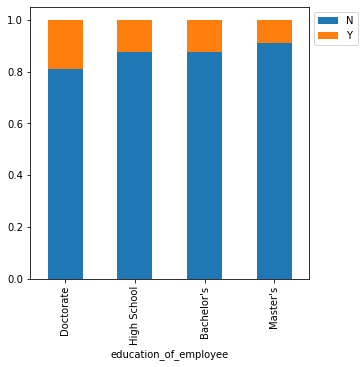

<IPython.core.display.Javascript object>

In [39]:
stacked_barplot(data, "education_of_employee", "requires_job_training")

Observations: 
- Regardless of the education level, most visa candidates do not require job training. 

___
### Leading Questions:

#### 1. Those with higher education may want to travel abroad for a well-paid job. Does education play a role in Visa certification?
`education_of_employee` vs `case_status`

case_status            Certified  Denied    All
education_of_employee                          
All                        17018    8462  25480
Bachelor's                  6367    3867  10234
High School                 1164    2256   3420
Master's                    7575    2059   9634
Doctorate                   1912     280   2192
------------------------------------------------------------------------------------------------------------------------


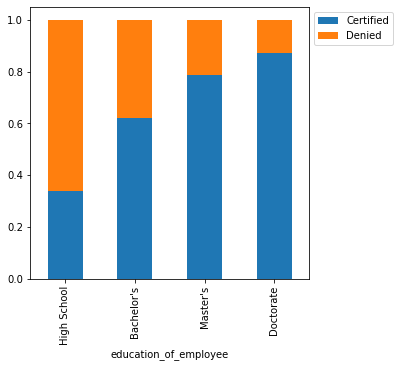

<IPython.core.display.Javascript object>

In [40]:
stacked_barplot(data, "education_of_employee", "case_status")

Observations:
- The more educated a candidate, the more likely they are to have their visa accepted. Candidates with a doctoral degree were 90% likely to have their visa ratified, compared with ~36% of high school graduates. 

#### 2. How does the visa status vary across different continents? 
`case_status` vs `continent`

case_status    Certified  Denied    All
continent                              
All                17018    8462  25480
Asia               11012    5849  16861
North America       2037    1255   3292
Europe              2957     775   3732
South America        493     359    852
Africa               397     154    551
Oceania              122      70    192
------------------------------------------------------------------------------------------------------------------------


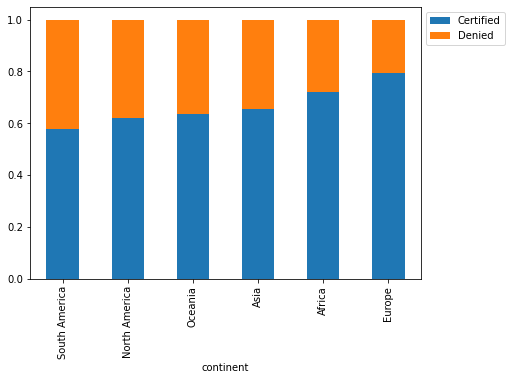

<IPython.core.display.Javascript object>

In [41]:
stacked_barplot(data, "continent", "case_status")

continent    Africa   Asia  Europe  North America  Oceania  South America  \
case_status                                                                 
All             551  16861    3732           3292      192            852   
Certified       397  11012    2957           2037      122            493   
Denied          154   5849     775           1255       70            359   

continent      All  
case_status         
All          25480  
Certified    17018  
Denied        8462  
------------------------------------------------------------------------------------------------------------------------


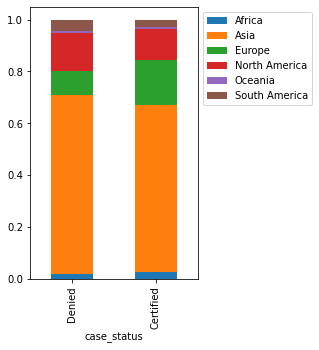

<IPython.core.display.Javascript object>

In [42]:
stacked_barplot(data, "case_status", "continent")

Observations:
- Candidates from the Americas had the lowest likelihood of their visa being accepted. European, African, and Asian candidates were most likely to have their visa accepted. 
- Candidates from Asia made up the largest portion of both groups, which is logical when one looks at the population of each continent. 

#### 3. Experienced professionals might look abroad for opportunities to improve their lifestyles and career development. Does work experience influence visa status? 
`has_job_experience` vs `case_status`

case_status         Certified  Denied    All
has_job_experience                          
All                     17018    8462  25480
N                        5994    4684  10678
Y                       11024    3778  14802
------------------------------------------------------------------------------------------------------------------------


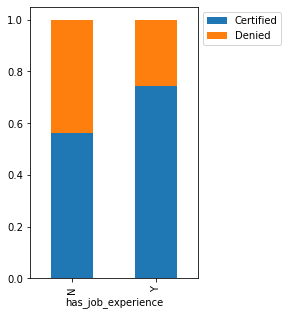

<IPython.core.display.Javascript object>

In [43]:
stacked_barplot(data, "has_job_experience", "case_status")

Observations:
- Those with job experience are more likely to have their visas certified (75%). Those with no job experience only had a 57% certification rate.

#### 4. In the United States, employees are paid at different intervals. Which pay unit is most likely to be certified for a visa?
`unit_of_wage` vs `case_status`

case_status   Certified  Denied    All
unit_of_wage                          
All               17018    8462  25480
Year              16047    6915  22962
Hour                747    1410   2157
Week                169     103    272
Month                55      34     89
------------------------------------------------------------------------------------------------------------------------


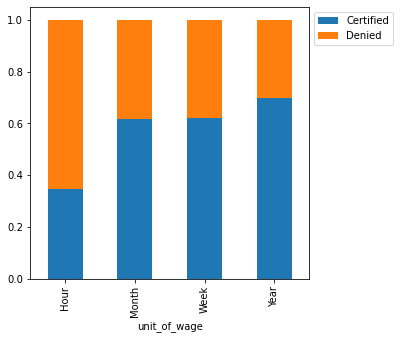

<IPython.core.display.Javascript object>

In [44]:
stacked_barplot(data, "unit_of_wage", "case_status")

Observations:
- Salaried employees were most likely to have their visa certified (67%), followed by weekly (60%) and monthly employees.
- Hourly employees were least likely to have their visa certified with a 37% certification rate. 

#### 5. The US government has established a prevailing wage to protect local talent and foreign workers. How does the visa status change with the prevailing wage?
`prevailing_wage` vs `case_status`

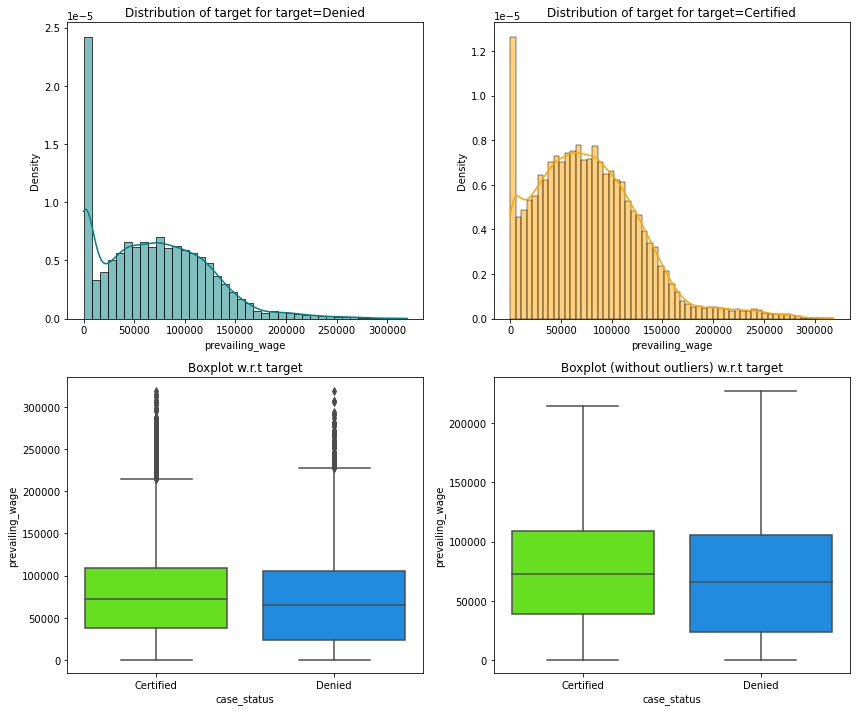

<IPython.core.display.Javascript object>

In [45]:
distribution_plot_wrt_target(data, "prevailing_wage", "case_status")

Observations:
- The median prevailing wage for certified candidates was higher than the median prevailing wage for candiates who were denied.
- The graph is heavily skewed to the right. 

___
## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering 
- Outlier detection and treatment (if needed)
- Preparing data for modeling 
- Any other preprocessing steps (if needed)

### Missing Value Treatment

In [46]:
# check for missing values
data.isnull().sum()

continent                0
education_of_employee    0
has_job_experience       0
requires_job_training    0
no_of_employees          0
yr_of_estab              0
region_of_employment     0
prevailing_wage          0
unit_of_wage             0
full_time_position       0
case_status              0
dtype: int64

<IPython.core.display.Javascript object>

- There are no missing values in the dataset. 

### Feature Engineering - Fix `no_of_employees`

During the EDA, it was noted that `no_of_employees` had a negative value. It is important to fix issues such as this one before building models. 

In [47]:
# Find where no_of_employees is negative
data[data["no_of_employees"] < 1]

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
245,Europe,Master's,N,N,-25,1980,Northeast,39452.9900,Year,Y,Certified
378,Asia,Bachelor's,N,Y,-11,2011,Northeast,32506.1400,Year,Y,Denied
832,South America,Master's,Y,N,-17,2002,South,129701.9400,Year,Y,Certified
2918,Asia,Master's,Y,N,-26,2005,Midwest,112799.4600,Year,Y,Certified
6439,Asia,Bachelor's,N,N,-14,2013,South,103.9700,Hour,Y,Denied
6634,Asia,Bachelor's,Y,N,-26,1923,West,5247.3200,Year,Y,Denied
7224,Europe,Doctorate,N,N,-25,1998,Midwest,141435.9500,Year,Y,Certified
7281,Asia,High School,N,N,-14,2000,Midwest,58488.5000,Year,Y,Denied
7318,Asia,Bachelor's,Y,Y,-26,2006,South,115005.6100,Year,Y,Certified
7761,Asia,Master's,N,N,-11,2009,Midwest,38457.5100,Year,Y,Certified


<IPython.core.display.Javascript object>

In [48]:
# Total no_of_employees with negative value.
data[data["no_of_employees"] < 1]["no_of_employees"].count()

33

<IPython.core.display.Javascript object>

- There are 33 instances where no_of_employees is negative. I will now take the absolute value of the no_of_employees column. 

In [49]:
# Taking the absolute value of the no_of_employees column
data["no_of_employees"] = abs(data["no_of_employees"])

<IPython.core.display.Javascript object>

In [50]:
# Check to see if the negative value is treated or not
data[data["no_of_employees"] < 1]["no_of_employees"].count()

0

<IPython.core.display.Javascript object>

### Outlier Detection and Treatment
- Check for outliers in the data.

#### Detection

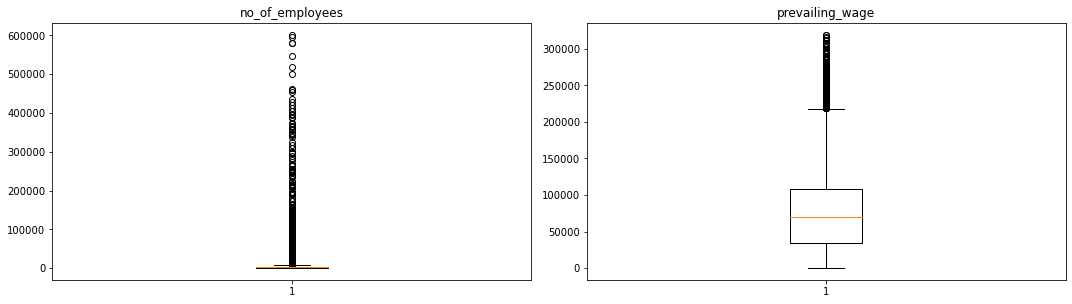

<IPython.core.display.Javascript object>

In [51]:
numeric_columns = data.select_dtypes(include=np.number).columns.tolist()
# dropping yr_of_estab as it is a temporal variable
numeric_columns.remove("yr_of_estab")

plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(3, 2, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

- `no_of_employees` and `prevailing_wage` both have outliers. 
- I will treat the outliers using flooring and capping.
    - replace the lower outliers with Q1 - 1.5IQR.
    - replace the upper outliers with Q3 + 1.5IQR.

#### Treatment

In [52]:
# Defining functions to treat outliers by flooring and capping


def treat_outliers(df, col):
    """
    Treats outliers in a variable

    df: dataframe
    col: dataframe column
    """
    Q1 = df[col].quantile(0.25)  # 25th quantile
    Q3 = df[col].quantile(0.75)  # 75th quantile
    IQR = Q3 - Q1
    Lower_Whisker = Q1 - 1.5 * IQR
    Upper_Whisker = Q3 + 1.5 * IQR

    # all the values smaller than Lower_Whisker will be assigned the value of Lower_Whisker
    # all the values greater than Upper_Whisker will be assigned the value of Upper_Whisker
    df[col] = np.clip(df[col], Lower_Whisker, Upper_Whisker)

    return df


def treat_outliers_all(df, col_list):
    """
    Treat outliers in a list of variables

    df: dataframe
    col_list: list of dataframe columns
    """
    for c in col_list:
        df = treat_outliers(df, c)

    return df


<IPython.core.display.Javascript object>

In [53]:
# treat_out_cols defines the columns with outliers
treat_out_cols = ["no_of_employees", "prevailing_wage"]
# treat outliers with flooring and capping
data = treat_outliers_all(data, treat_out_cols)

<IPython.core.display.Javascript object>

#### Check boxplots to make sure outliers were treated. 

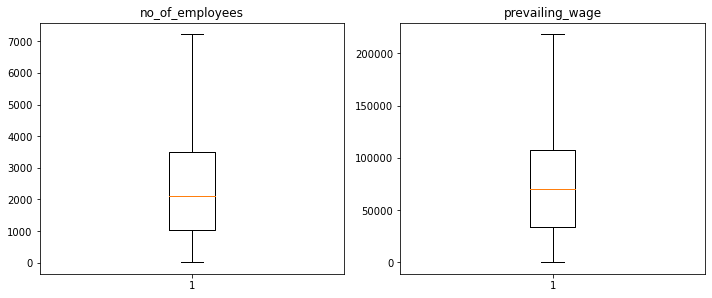

<IPython.core.display.Javascript object>

In [54]:
plt.figure(figsize=(15, 35))

for i, variable in enumerate(numeric_columns):
    plt.subplot(9, 3, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

- Outliers have been properly treated. Now the data can be prepared for modeling. 

### Prepare Data for Modeling
- The model should predict which visas will be certified.
- Prior to building a model, categorical variables must be encoded.
- The data will be split into train and test data in order to evaluate the model built on the training data. 


#### Encode Categorical Variables

In [55]:
# give value to categorical variables for better model performance.
replaceStruct = {
    "education_of_employee": {
        "High School": 1,
        "Bachelor's": 2,
        "Master's": 3,
        "Doctorate": 4,
    },
    "has_job_experience": {"N": 1, "Y": 2},
    "full_time_position": {"N": 1, "Y": 2},
    "requires_job_training": {"N": 1, "Y": 2},
    "unit_of_wage": {"Hour": 1, "Week": 2, "Month": 3, "Year": 4},
    "case_status": {"Denied": 0, "Certified": 1},
}
oneHotCols = {"continent", "region_of_employment"}

<IPython.core.display.Javascript object>

In [56]:
# Replacing string value to the numerical data
data = data.replace(replaceStruct)
# Code to create dummies for oneHotcols
data = pd.get_dummies(data, columns=oneHotCols)
data.head(10)

,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,prevailing_wage,unit_of_wage,full_time_position,case_status,region_of_employment_Island,region_of_employment_Midwest,region_of_employment_Northeast,region_of_employment_South,region_of_employment_West,continent_Africa,continent_Asia,continent_Europe,continent_North America,continent_Oceania,continent_South America
0,1,1,1,7227.0,2007,592.2029,1,2,0,0,0,0,0,1,0,1,0,0,0,0
1,3,2,1,2412.0,2002,83425.6500,4,2,1,0,0,1,0,0,0,1,0,0,0,0
2,2,1,2,7227.0,2008,122996.8600,4,2,0,0,0,0,0,1,0,1,0,0,0,0
3,2,1,1,98.0,1897,83434.0300,4,2,0,0,0,0,0,1,0,1,0,0,0,0
4,3,2,1,1082.0,2005,149907.3900,4,2,1,0,0,0,1,0,1,0,0,0,0,0
5,3,2,1,2339.0,2012,78252.1400,4,2,1,0,0,0,1,0,0,1,0,0,0,0
6,2,1,1,4985.0,1994,53635.3900,4,2,1,0,0,0,1,0,0,1,0,0,0,0
7,2,2,1,3035.0,1924,418.2298,1,2,0,0,0,0,0,1,0,0,0,1,0,0
8,2,1,1,4810.0,2012,74362.1900,4,2,1,0,1,0,0,0,0,1,0,0,0,0
9,4,2,1,2251.0,1995,67514.7600,4,2,1,0,0,0,1,0,0,0,1,0,0,0


<IPython.core.display.Javascript object>

#### Split Data in Train and Test Sets

In [57]:
# define dependent and independent variables
X = data.drop(["case_status"], axis=1)
Y = data["case_status"]

<IPython.core.display.Javascript object>

In [58]:
# check the distribution of the target class
Y.value_counts()

1    17018
0     8462
Name: case_status, dtype: int64

<IPython.core.display.Javascript object>

- This data exhibits a significant imbalance in the distribution of target classes, therefore I will use stratified sampling to ensure relative class frequencies are approximately preserved in train and test sets. 

In [59]:
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1, stratify=Y
)

<IPython.core.display.Javascript object>

In [60]:
# print shape of training and test set
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (17836, 19)
Shape of test set :  (7644, 19)
Percentage of classes in training set:
1    0.667919
0    0.332081
Name: case_status, dtype: float64
Percentage of classes in test set:
1    0.667844
0    0.332156
Name: case_status, dtype: float64


<IPython.core.display.Javascript object>

___
## EDA

- It is a good idea to explore the data once again after manipulating it.
- `no_of_employees` and `prevailing_wage` were treated for outliers above. I will explore these variables using univariate analysis. I will also return to multivariate analysis to check how the data changed.

#### `no_of_employees`

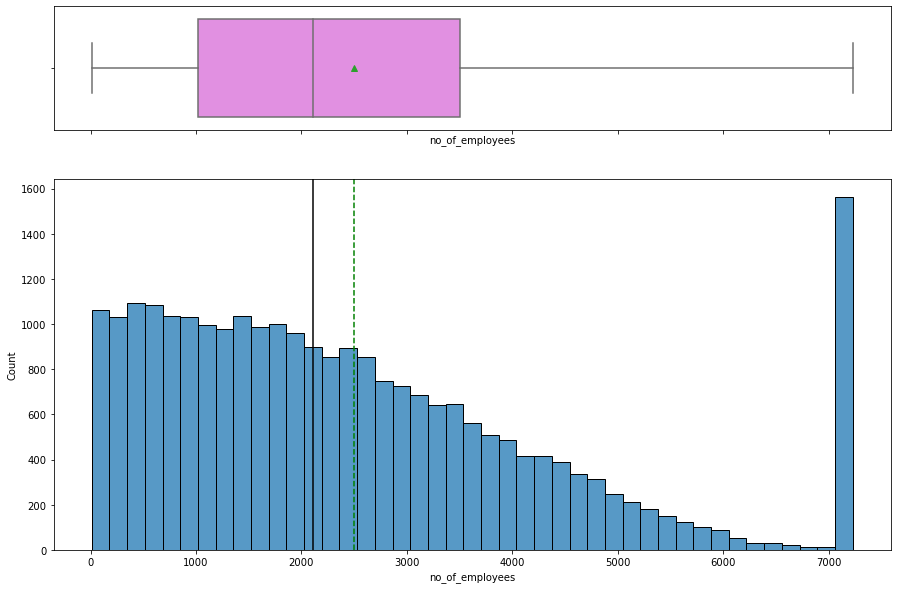

<IPython.core.display.Javascript object>

In [61]:
histogram_boxplot(data, "no_of_employees")
plt.show()

Observations:
- Following the treatment of outliers, the median number of employees is about 2000. 
- The graph is also far more readable than it was previously. 
- The graph is skewed to the right, but not terribly so. 

#### `prevailing_wage`

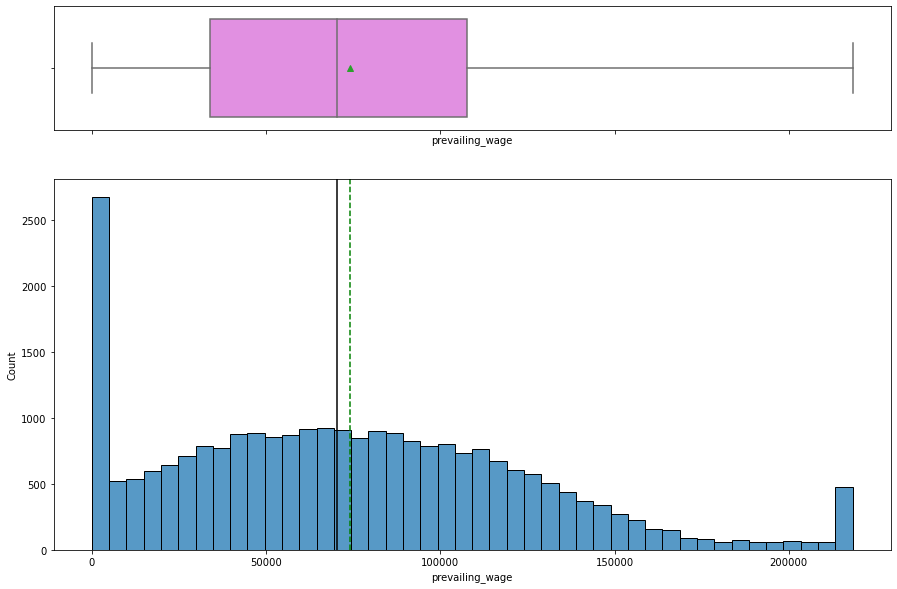

<IPython.core.display.Javascript object>

In [62]:
histogram_boxplot(data, "prevailing_wage")
plt.show()

- Following the treatment of outliers, the median wage for employees appears to be approximately 75,000 dollars. 
- The distribution appears to be mostly normal. 

#### Multivariate Analysis

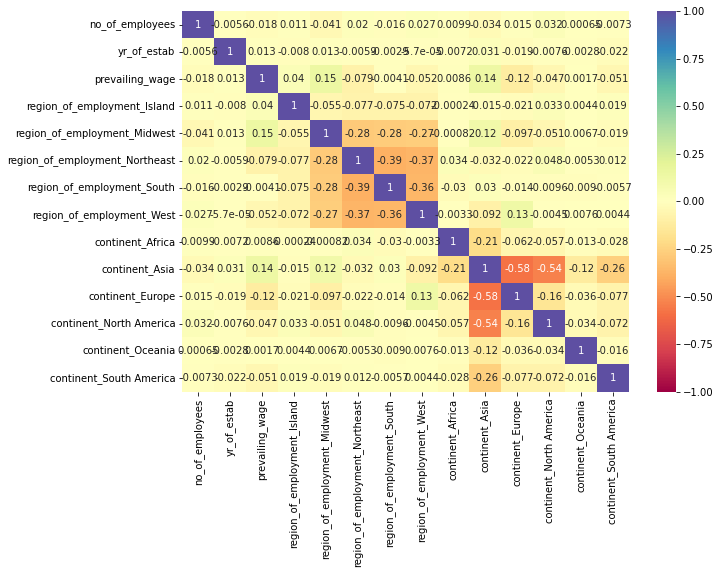

<IPython.core.display.Javascript object>

In [63]:
# heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(data.corr(), annot=True, cmap="Spectral", vmin=-1, vmax=1)
plt.show()

- The numeric values are not showing strong correlation with one another. 

___
## Building bagging and boosting models
### Model evaluation criteria:
#### The model can make inaccurate predictions such as:
   1. The model predicts the visa application should be certified. In reality, the visa application is denied.
   2. The model predicts the visa application will not be certified. In reality, the visa application is certified.

#### Which case is more important?
- Both cases are equally important due to two factors. 
    - If the visa is certified for an applicant that does not meet the criteria set out by the INA, another applicant will lose a spot that they deserve. 
    - If a visa is not certified for a deserving applicant, American employers will lose out on potential talent. 
    
#### How can the model solve this dilemma?
- `F1 Score` is an evaluation metric that minimizes both false positives, and false negatives. 
- The model will be built using class weights so that the model can focus equally on both classes. 

## MODEL BUILDING -- BAGGING

In [64]:
## Function to create confusion matrix
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

<IPython.core.display.Javascript object>

In [65]:
# define a function to compute different metrics to check performance of a classification model built using sklearn


def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

<IPython.core.display.Javascript object>

### Building the Decision Tree Model
- The model will be built utilizing the DecisionTreeClassifier function with the default gini criteria to split. 
- If the frequency of class A is 10%, and the frequency of class B is 90%, then class B will become the dominant class. Decision trees are biased towards dominant classes.
- To prevent this bias, the dictionary {0:0.67,1:0.33} will be parsed to specify the weight of each class. 
- class_weight is a hyperparamter for the decision tree classifier. 

In [66]:
# build a decision tree with DecisionTreeClassifier and split with gini
DTmodel = DecisionTreeClassifier(
    criterion="gini", class_weight={0: 0.67, 1: 0.33}, random_state=1
)
# Fitting decision tree on train data
DTmodel.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.67, 1: 0.33}, random_state=1)

<IPython.core.display.Javascript object>

#### Checking decision tree model performance on training set

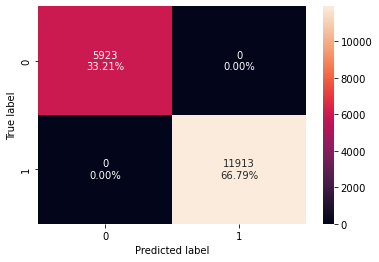

<IPython.core.display.Javascript object>

In [67]:
confusion_matrix_sklearn(DTmodel, X_train, y_train)

In [68]:
decision_tree_perf_train = model_performance_classification_sklearn(
    DTmodel, X_train, y_train
)
decision_tree_perf_train

,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


<IPython.core.display.Javascript object>

- The model is able to recall all points on the training set.
- This leads to overfitting, the decision tree performs well on the training set but fails to replicate the same performance on the test set. 
- Decision trees continue to grow and classify each data point correctly if restrictions are not applied. 
- Let's check the performance on the testing set.

#### Checking decision tree model perfomance on testing set

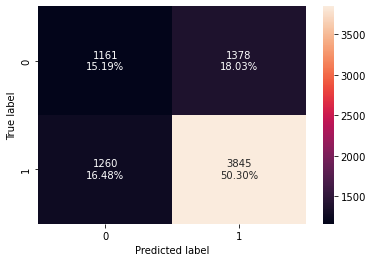

<IPython.core.display.Javascript object>

In [69]:
confusion_matrix_sklearn(DTmodel, X_test, y_test)

In [70]:
decision_tree_perf_test = model_performance_classification_sklearn(
    DTmodel, X_test, y_test
)
decision_tree_perf_test

,Accuracy,Recall,Precision,F1
0,0.654893,0.753183,0.736167,0.744578


<IPython.core.display.Javascript object>

- As I suspected, the test set performs poorly when compared to the training set. 
- Overall, the model is not bad, but hyperparameter tuning could help the performance of the model. 

### Bagging Classifier

In [71]:
bagging_classifier = BaggingClassifier(random_state=1)
bagging_classifier.fit(X_train, y_train)

BaggingClassifier(random_state=1)

<IPython.core.display.Javascript object>

#### Checking bagging classifier model performance on training set

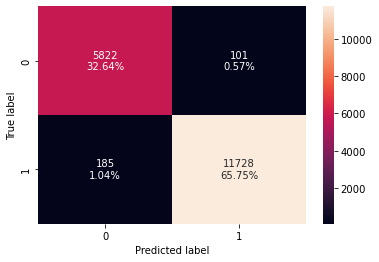

<IPython.core.display.Javascript object>

In [72]:
# create confusion matrix for training data
confusion_matrix_sklearn(bagging_classifier, X_train, y_train)

In [73]:
# check performance on train data
bagging_classifier_model_train_perf = model_performance_classification_sklearn(
    bagging_classifier, X_train, y_train
)
bagging_classifier_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.983965,0.984471,0.991462,0.987954


<IPython.core.display.Javascript object>

- Accuracy, recall, precision, and F1 are all high.
- It is very likely that the model is overfitting; however, I will have to check the testing set. 

#### Checking bagging classifier model performance on testing set

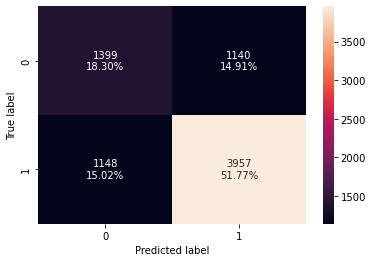

<IPython.core.display.Javascript object>

In [74]:
# create confusion matrix for test data
confusion_matrix_sklearn(bagging_classifier, X_test, y_test)

In [75]:
# check performance on test data
bagging_classifier_model_test_perf = model_performance_classification_sklearn(
    bagging_classifier, X_test, y_test
)
bagging_classifier_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.70068,0.775122,0.776339,0.77573


<IPython.core.display.Javascript object>

- The model is overfitting on the training data. I will tune the model shortly. 

### Random Forest

In [76]:
# define random forest with random state = 1
rf_estimator = RandomForestClassifier(random_state=1)
rf_estimator.fit(X_train, y_train)

RandomForestClassifier(random_state=1)

<IPython.core.display.Javascript object>

#### Checking random forest model performance on training set


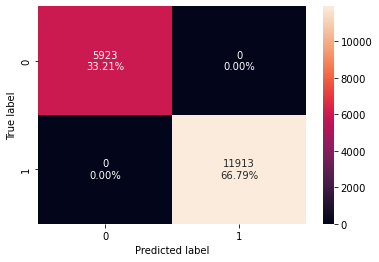

<IPython.core.display.Javascript object>

In [77]:
# Confusion matrix for training set
confusion_matrix_sklearn(rf_estimator, X_train, y_train)

In [78]:
# Code to check performance on train data
rf_estimator_model_train_perf = model_performance_classification_sklearn(
    rf_estimator, X_train, y_train
)
rf_estimator_model_train_perf

,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


<IPython.core.display.Javascript object>

- The model is overfitting, let's check the testing set. 

#### Checking random forest model performance on testing set

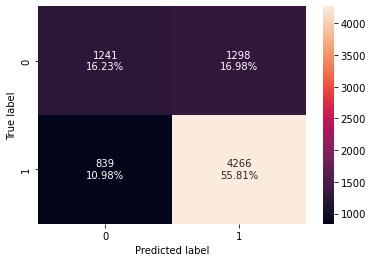

<IPython.core.display.Javascript object>

In [79]:
# Confusion matrix for testing set
confusion_matrix_sklearn(rf_estimator, X_test, y_test)

In [80]:
# Code to check performance on test data
rf_estimator_model_test_perf = model_performance_classification_sklearn(
    rf_estimator, X_test, y_test
)
rf_estimator_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.720434,0.835651,0.766715,0.7997


<IPython.core.display.Javascript object>

- The testing model is not bad, however, the training data is heavily overfitted. Hyperparameter tuning might help improve model performance. 


## Model Improvement -- Bagging
### Hyperparameter Tuning - Decision Tree
- Hyperparameter tuning is not a direct process; therefore, experimentation will be utilized. 
- Grid search is a tuning technique that computes optimal values of hyperparameters. 
- To tune the decision tree model, I will use grid search. 

In [81]:
# Choose the type of classifier.
dtree_estimator = DecisionTreeClassifier(
    random_state=1, class_weight={0: 0.67, 1: 0.33}
)

# Grid of parameters to choose from
parameters = {
    "max_depth": np.arange(5, 16, 5),
    "max_leaf_nodes": [2, 5, 7, 9],
    "min_samples_split": [3, 5, 7],
    "min_impurity_decrease": [0.0001, 0.001, 0.01],
}

# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(dtree_estimator, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
dtree_estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
dtree_estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.67, 1: 0.33}, max_depth=5,
                       max_leaf_nodes=9, min_impurity_decrease=0.0001,
                       min_samples_split=3, random_state=1)

<IPython.core.display.Javascript object>

#### Check tuned performance of decision tree model on training set

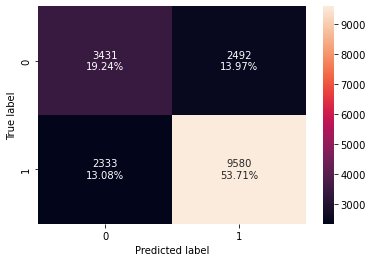

<IPython.core.display.Javascript object>

In [82]:
confusion_matrix_sklearn(dtree_estimator, X_train, y_train)

In [83]:
decision_tree_tune_perf_train = model_performance_classification_sklearn(
    dtree_estimator, X_train, y_train
)
decision_tree_tune_perf_train

,Accuracy,Recall,Precision,F1
0,0.72948,0.804164,0.793572,0.798833


<IPython.core.display.Javascript object>

- The model is no longer suffering from overfitting. Let's check the testing set. 

#### Check tuned performance of decision tree model on testing set

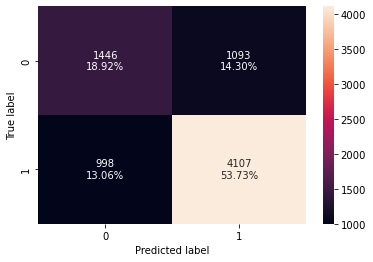

<IPython.core.display.Javascript object>

In [84]:
confusion_matrix_sklearn(dtree_estimator, X_test, y_test)

In [85]:
decision_tree_tune_perf_test = model_performance_classification_sklearn(
    dtree_estimator, X_test, y_test
)
decision_tree_tune_perf_test

,Accuracy,Recall,Precision,F1
0,0.726452,0.804505,0.789808,0.797089


<IPython.core.display.Javascript object>

- After tuning hyperparameters, the performance of the decision tree model has greatly improved. The training set no longer suffers from overfitting. 

### Hyperparameter Tuning - Bagging Classifier
- There are several ways to tune hyperparameters for a bagging classifier. 
**Some of the important hyperparameters available for bagging classifier are:**

- base_estimator: The base estimator to fit on random subsets of the dataset. If None(default), then the base estimator is a decision tree.
- n_estimators: The number of trees in the forest, default = 100.
- max_features: The number of features to consider when looking for the best split. 
- bootstrap: Whether bootstrap samples are used when building trees. If False, the entire dataset is used to build each tree, default=True.
- bootstrap_features: If it is true, then features are drawn with replacement. Default value is False.
- max_samples: If bootstrap is True, then the number of samples to draw from X to train each base estimator. If None (default), then draw N samples, where N is the number of observations in the train data.
- oob_score: Whether to use out-of-bag samples to estimate the generalization accuracy, default=False.

In [86]:
# Choose the type of classifier.
bagging_estimator_tuned = BaggingClassifier(random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {
    "max_samples": [0.7, 0.8, 0.9, 1],
    "max_features": [0.7, 0.8, 0.9, 1],
    "n_estimators": np.arange(10, 111, 10),
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(bagging_estimator_tuned, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
bagging_estimator_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
bagging_estimator_tuned.fit(X_train, y_train)

BaggingClassifier(max_features=0.7, max_samples=0.9, n_estimators=110,
                  random_state=1)

<IPython.core.display.Javascript object>

#### Checking tuned bagging classifier model performance on training set

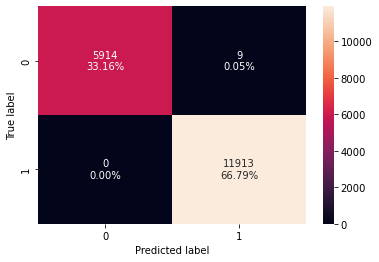

<IPython.core.display.Javascript object>

In [87]:
# Confusion matrix for training set
confusion_matrix_sklearn(bagging_estimator_tuned, X_train, y_train)

In [88]:
# Code to check performance for train data on tuned estimator
bagging_estimator_tuned_model_train_perf = model_performance_classification_sklearn(
    bagging_estimator_tuned, X_train, y_train
)
bagging_estimator_tuned_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.999495,1.0,0.999245,0.999622


<IPython.core.display.Javascript object>

#### Checking tuned bagging classifier model performance on testing set

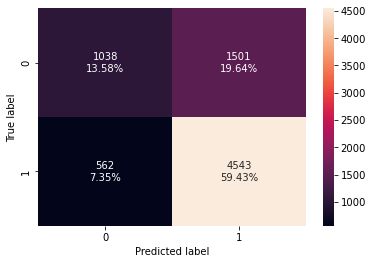

<IPython.core.display.Javascript object>

In [89]:
# Confusion matrix for testing set
confusion_matrix_sklearn(bagging_estimator_tuned, X_test, y_test)

In [90]:
# Code to check performance for train data on tuned estimator
bagging_estimator_tuned_model_test_perf = model_performance_classification_sklearn(
    bagging_estimator_tuned, X_test, y_test
)
bagging_estimator_tuned_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.730115,0.889912,0.751655,0.814961


<IPython.core.display.Javascript object>

- The model performance has improved after hyperparamter tuning. 

### Hyperparameter Tuning - Random Forest
**Now I will tune the random forest classifier. Some of the important hyperparameters available for random forest classifier are:**

- n_estimators: The number of trees in the forest, default = 100.
- max_features: The number of features to consider when looking for the best split. 
- class_weight: Weights associated with classes in the form {class_label: weight}.If not given, all classes are supposed to have weight one.  
- For example: If the frequency of class 0 is 80% and the frequency of class 1 is 20% in the data, then class 0 will become the dominant class and the model will become biased toward the dominant classes. In this case, we can pass a dictionary {0:0.2,1:0.8} to the model to specify the weight of each class and the random forest will give more weightage to class 1. 
- bootstrap: Whether bootstrap samples are used when building trees. If False, the entire dataset is used to build each tree, default=True.
- max_samples: If bootstrap is True, then the number of samples to draw from X to train each base estimator. If None (default), then draw N samples, where N is the number of observations in the train data.
- oob_score: Whether to use out-of-bag samples to estimate the generalization accuracy, default=False.

- Note: A lot of hyperparameters of Decision Trees are also available to tune  Random Forest like max_depth, min_sample_split etc.

In [91]:
# Choose the type of classifier.
rf_tuned = RandomForestClassifier(
    random_state=1
)

parameters = {
    "max_depth": list(np.arange(5, 15, 5)),
    "max_features": ["sqrt", "log2"],
    "min_samples_split": [5, 7],
    "n_estimators": np.arange(15, 26, 5),
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(rf_tuned, parameters, scoring=acc_scorer, cv=5, n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rf_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
rf_tuned.fit(X_train, y_train)


RandomForestClassifier(max_depth=10, max_features='sqrt', min_samples_split=7,
                       n_estimators=25, random_state=1)

<IPython.core.display.Javascript object>

#### Checking tuned random forest model performance on training set

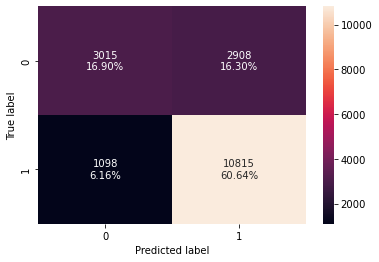

<IPython.core.display.Javascript object>

In [92]:
# Confusion matrix for training set
confusion_matrix_sklearn(rf_tuned, X_train, y_train)

In [93]:
# Code to check performance on train data
rf_tuned_model_train_perf = model_performance_classification_sklearn(
    rf_tuned, X_train, y_train
)
rf_tuned_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.775398,0.907832,0.788093,0.843735


<IPython.core.display.Javascript object>

- The training model is doing much better with overfitting. 
- Let's check the testing model. 

#### Checking tuned random forest model performance on testing set

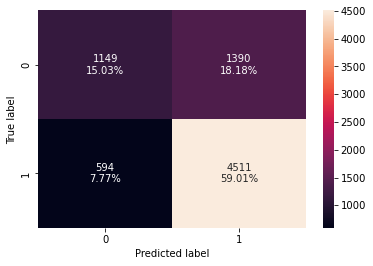

<IPython.core.display.Javascript object>

In [94]:
# Confusion matrix for testing set
confusion_matrix_sklearn(rf_tuned, X_test, y_test)

In [95]:
# Code to check performance on test data
rf_tuned_model_test_perf = model_performance_classification_sklearn(
    rf_tuned, X_test, y_test
)
rf_tuned_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.74045,0.883643,0.764447,0.819735


<IPython.core.display.Javascript object>

- The model no longer suffers from overfitting. The tuned model performs well on all parameters. 

___
## MODEL BUILDING -- BOOSTING

### AdaBoost

In [96]:
# Fitting the model
ab_classifier = AdaBoostClassifier(random_state=1)
ab_classifier.fit(X_train, y_train)

AdaBoostClassifier(random_state=1)

<IPython.core.display.Javascript object>

#### Checking AdaBoost model performance on training set

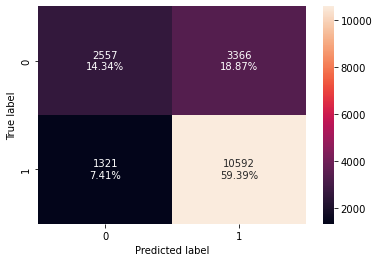

<IPython.core.display.Javascript object>

In [97]:
# Creating confusion matrix
confusion_matrix_sklearn(ab_classifier, X_train, y_train)

In [98]:
# Calculating training performance
ab_classifier_model_train_perf = model_performance_classification_sklearn(
    ab_classifier, X_train, y_train
)
print(ab_classifier_model_train_perf)

   Accuracy    Recall  Precision        F1
0  0.737217  0.889113   0.758848  0.818832


<IPython.core.display.Javascript object>

- Recall is very high, while other metrics are performing well. The model does not appear to suffer from overfitting. 

#### Checking AdaBoost model performance on testing set

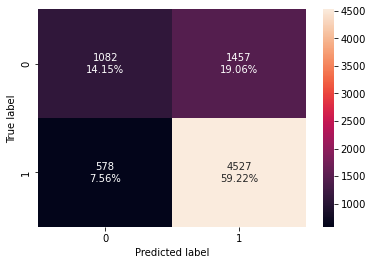

<IPython.core.display.Javascript object>

In [99]:
# Creating confusion matrix
confusion_matrix_sklearn(ab_classifier, X_test, y_test)

In [100]:
# Calculating testing performance
ab_classifier_model_test_perf = model_performance_classification_sklearn(
    ab_classifier, X_test, y_test
)
print(ab_classifier_model_test_perf)

   Accuracy    Recall  Precision        F1
0  0.733778  0.886778   0.756517  0.816485


<IPython.core.display.Javascript object>

- AdaBoost does not suffer from overfitting, unlike previous models. The test F1 score is also adequate. 
- As with the other models, I will tune hyperparameters later. 

### GradientBoost

In [101]:
# define Gradient Boosting Classifier with random state = 1
gb_classifier = GradientBoostingClassifier(random_state=1)
# Code to fit Gradient Boosting Classifier on the train data
gb_classifier.fit(X_train, y_train)

GradientBoostingClassifier(random_state=1)

<IPython.core.display.Javascript object>

#### Checking GradientBoost model performance on training set

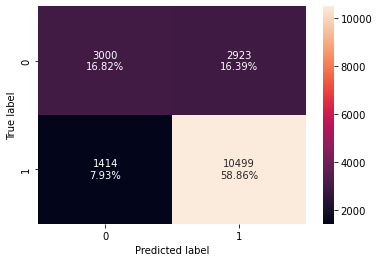

<IPython.core.display.Javascript object>

In [102]:
# create confusion matrix for train data
confusion_matrix_sklearn(gb_classifier, X_train, y_train)

In [103]:
# Code to check performance on train data
gb_classifier_model_train_perf = model_performance_classification_sklearn(
    gb_classifier, X_train, y_train
)
print("Training performance:\n", gb_classifier_model_train_perf)

Training performance:
    Accuracy    Recall  Precision        F1
0   0.75684  0.881306   0.782223  0.828814


<IPython.core.display.Javascript object>

- The model is performing well, let's check the testing set. 

#### Checking GradientBoost model performance on testing set

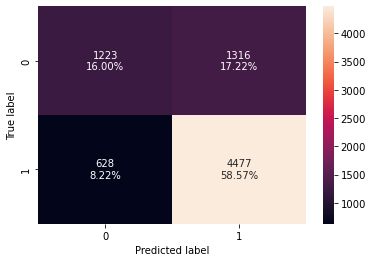

<IPython.core.display.Javascript object>

In [104]:
# create confusion matrix for testing data
confusion_matrix_sklearn(gb_classifier, X_test, y_test)

In [105]:
gb_classifier_model_test_perf = model_performance_classification_sklearn(
    gb_classifier, X_test, y_test
)
print("Testing performance:\n", gb_classifier_model_test_perf)

Testing performance:
    Accuracy    Recall  Precision        F1
0  0.745683  0.876983   0.772829  0.821619


<IPython.core.display.Javascript object>

- The GradientBoost classifier has the best performance so far. 
- F1, which is the metric the model is measuring for, is good. 
- Hyperparameters will be tuned later in the notebook. 

___
##  Will tuning the hyperparameters improve the model performance? 
## Model Improvement -- Boosting

### Model Improvement -- AdaBoost

In [106]:
# Choose the type of classifier.
abc_tuned = AdaBoostClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    # Let's try different max_depth for base_estimator
    "base_estimator": [
        DecisionTreeClassifier(
            max_depth=1, class_weight={0: 0.67, 1: 0.33}, random_state=1
        ),
        DecisionTreeClassifier(
            max_depth=2, class_weight={0: 0.67, 1: 0.33}, random_state=1
        ),
        DecisionTreeClassifier(
            max_depth=3, class_weight={0: 0.67, 1: 0.33}, random_state=1
        ),
    ],
    "n_estimators": np.arange(50, 110, 10),
    "learning_rate": np.arange(0.1, 1, 0.1),
}

# Type of scoring used to compare parameter  combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(abc_tuned, parameters, scoring=scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
abc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
abc_tuned.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(class_weight={0: 0.67,
                                                                       1: 0.33},
                                                         max_depth=1,
                                                         random_state=1),
                   learning_rate=0.1, n_estimators=100, random_state=1)

<IPython.core.display.Javascript object>

#### Checking AdaBoost model performance on training set

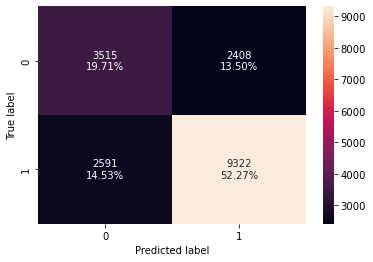

<IPython.core.display.Javascript object>

In [107]:
# create confusion matrix for training data on tuned estimator
confusion_matrix_sklearn(abc_tuned, X_train, y_train)

In [108]:
# Code to check performance for train data on tuned estimator
abc_tuned_model_train_perf = model_performance_classification_sklearn(
    abc_tuned, X_train, y_train
)
print(abc_tuned_model_train_perf)

   Accuracy    Recall  Precision        F1
0  0.719724  0.782507   0.794714  0.788563


<IPython.core.display.Javascript object>

#### Checking AdaBoost model performance on testing set

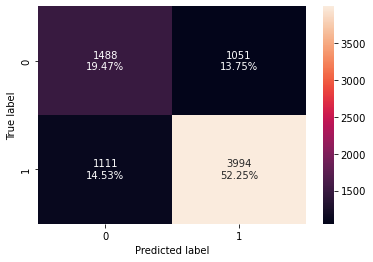

<IPython.core.display.Javascript object>

In [109]:
# Code to create confusion matrix for test data on tuned estimator
confusion_matrix_sklearn(abc_tuned, X_test, y_test)

In [110]:
# Code to check performance for test data on tuned estimator
abc_tuned_model_test_perf = model_performance_classification_sklearn(
    abc_tuned, X_test, y_test
)
print(abc_tuned_model_test_perf)

   Accuracy   Recall  Precision        F1
0  0.717164  0.78237   0.791675  0.786995


<IPython.core.display.Javascript object>

- Performance of both the training and testing set has decreased after hyperparameter tuning. 
- Let's check the other models. 

### Model Improvement -- GradientBoost

In [111]:
# Choose the type of classifier.
gbc_tuned = GradientBoostingClassifier(
    init=AdaBoostClassifier(random_state=1), random_state=1
)

# Grid of parameters to choose from
parameters = {
    "n_estimators": [100, 150, 200, 250],
    "subsample": [0.8, 0.9, 1],
    "max_features": [0.7, 0.8, 0.9, 1],
    "learning_rate": np.arange(0.1, 0.21, 0.1),
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(gbc_tuned, parameters, scoring=scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
gbc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
gbc_tuned.fit(X_train, y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           max_features=0.8, random_state=1, subsample=1)

<IPython.core.display.Javascript object>

#### Checking GradientBoost model performance on training set

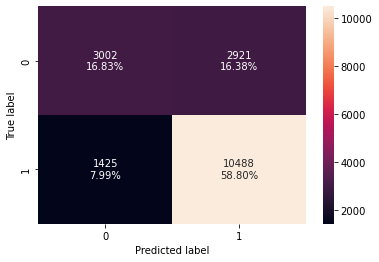

<IPython.core.display.Javascript object>

In [112]:
# create confusion matrix for train data
confusion_matrix_sklearn(gbc_tuned, X_train, y_train)

In [113]:
# check performance on train data
gbc_tuned_model_train_perf = model_performance_classification_sklearn(
    gbc_tuned, X_train, y_train
)
print("Training performance:\n", gbc_tuned_model_train_perf)

Training performance:
    Accuracy    Recall  Precision        F1
0  0.756336  0.880383   0.782161  0.828371


<IPython.core.display.Javascript object>

#### Checking GradientBoost model performance on testing set

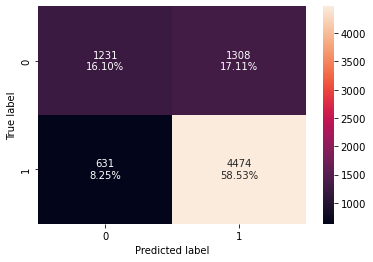

<IPython.core.display.Javascript object>

In [114]:
# create confusion matrix for test data
confusion_matrix_sklearn(gbc_tuned, X_test, y_test)

In [115]:
# Code to check performance on test data
gbc_tuned_model_test_perf = model_performance_classification_sklearn(
    gbc_tuned, X_test, y_test
)
print("Testing performance:\n", gbc_tuned_model_test_perf)

Testing performance:
    Accuracy    Recall  Precision        F1
0  0.746337  0.876396   0.773781  0.821898


<IPython.core.display.Javascript object>

- Once again, the model performance decreased after hyperparameter tuning. 
- The f1 score is still high, which means the model is reducing false positives and negatives. 

## Build Stacking Classifier

In [116]:
estimators = [
    ("Random Forest", rf_tuned),
    ("Gradient Boosting", gbc_tuned),
    ("Decision Tree", dtree_estimator),
]

# tune the model using ada boost
final_estimator = abc_tuned

# Code to define Stacking Classifier
stacking_classifier = StackingClassifier(
    estimators=estimators, final_estimator=final_estimator
)
# Code to fit Stacking Classifier on the train data
stacking_classifier.fit(X_train, y_train)

StackingClassifier(estimators=[('Random Forest',
                                RandomForestClassifier(max_depth=10,
                                                       max_features='sqrt',
                                                       min_samples_split=7,
                                                       n_estimators=25,
                                                       random_state=1)),
                               ('Gradient Boosting',
                                GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                                                           max_features=0.8,
                                                           random_state=1,
                                                           subsample=1)),
                               ('Decision Tree',
                                DecisionTreeClassifier(class_weight={0: 0.67,
                                                                     1: 0.33},


<IPython.core.display.Javascript object>

#### Checking stacking classifier performance on training set

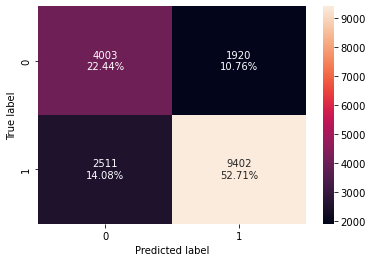

<IPython.core.display.Javascript object>

In [117]:
# create confusion matrix for train data
confusion_matrix_sklearn(stacking_classifier, X_train, y_train)

In [118]:
# check performance on train data
stacking_classifier_model_train_perf = model_performance_classification_sklearn(
    stacking_classifier, X_train, y_train
)
print("Training performance:\n", stacking_classifier_model_train_perf)

Training performance:
    Accuracy    Recall  Precision        F1
0   0.75157  0.789222   0.830419  0.809296


<IPython.core.display.Javascript object>

- The model is performing well and does not appear to suffer from overfitting. 
- Let's check the testing set. 

#### Checking stacking classifier performance on testing set

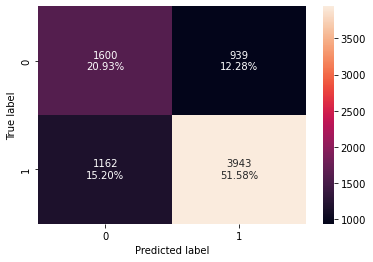

<IPython.core.display.Javascript object>

In [119]:
# check performance on test data
confusion_matrix_sklearn(stacking_classifier, X_test, y_test)

In [120]:
# check performance on test data
stacking_classifier_model_test_perf = model_performance_classification_sklearn(
    stacking_classifier, X_test, y_test
)
print("Testing performance:\n", stacking_classifier_model_test_perf)

Testing performance:
    Accuracy   Recall  Precision        F1
0  0.725144  0.77238   0.807661  0.789627


<IPython.core.display.Javascript object>

- The stacking classifier returns similar performance to XGBoost with less overfitting. 
- Let's compare all models. 

___
## Model Performance Comparison and Conclusions

### Model Performance Comparison

In [121]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        decision_tree_perf_train.T,
        decision_tree_tune_perf_train.T,
        bagging_classifier_model_train_perf.T,
        bagging_estimator_tuned_model_train_perf.T,
        rf_estimator_model_train_perf.T,
        rf_tuned_model_train_perf.T,
        ab_classifier_model_train_perf.T,
        abc_tuned_model_train_perf.T,
        gb_classifier_model_train_perf.T,
        gbc_tuned_model_train_perf.T,
        stacking_classifier_model_train_perf.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree",
    "Tuned Decision Tree",
    "Bagging Classifier",
    "Tuned Bagging Classifier",
    "Random Forest",
    "Tuned Random Forest",
    "Adaboost Classifier",
    "Tuned Adaboost Classifier",
    "Gradient Boost Classifier",
    "Tuned Gradient Boost Classifier",
    "Stacking Classifier",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Decision Tree,Tuned Decision Tree,Bagging Classifier,Tuned Bagging Classifier,Random Forest,Tuned Random Forest,Adaboost Classifier,Tuned Adaboost Classifier,Gradient Boost Classifier,Tuned Gradient Boost Classifier,Stacking Classifier
Accuracy,1.0,0.729480,0.983965,0.999495,1.0,0.775398,0.737217,0.719724,0.756840,0.756336,0.751570
Recall,1.0,0.804164,0.984471,1.000000,1.0,0.907832,0.889113,0.782507,0.881306,0.880383,0.789222
Precision,1.0,0.793572,0.991462,0.999245,1.0,0.788093,0.758848,0.794714,0.782223,0.782161,0.830419
F1,1.0,0.798833,0.987954,0.999622,1.0,0.843735,0.818832,0.788563,0.828814,0.828371,0.809296


<IPython.core.display.Javascript object>

- Some models are heavily overfitting the training data. 
- Let's check the testing performance. 

In [122]:
# testing performance comparison
models_test_comp_df = pd.concat(
    [
        decision_tree_perf_test.T,
        decision_tree_tune_perf_test.T,
        bagging_classifier_model_test_perf.T,
        bagging_estimator_tuned_model_test_perf.T,
        rf_estimator_model_test_perf.T,
        rf_tuned_model_test_perf.T,
        ab_classifier_model_test_perf.T,
        abc_tuned_model_test_perf.T,
        gb_classifier_model_test_perf.T,
        gbc_tuned_model_test_perf.T,
        stacking_classifier_model_test_perf.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Decision Tree",
    "Tuned Decision Tree",
    "Bagging Classifier",
    "Tuned Bagging Classifier",
    "Random Forest",
    "Tuned Random Forest",
    "Adaboost Classifier",
    "Tuned Adaboost Classifier",
    "Gradient Boost Classifier",
    "Tuned Gradient Boost Classifier",
    "Stacking Classifier",
]
print("Testing performance comparison:")
models_test_comp_df

Testing performance comparison:


,Decision Tree,Tuned Decision Tree,Bagging Classifier,Tuned Bagging Classifier,Random Forest,Tuned Random Forest,Adaboost Classifier,Tuned Adaboost Classifier,Gradient Boost Classifier,Tuned Gradient Boost Classifier,Stacking Classifier
Accuracy,0.654893,0.726452,0.700680,0.730115,0.720434,0.740450,0.733778,0.717164,0.745683,0.746337,0.725144
Recall,0.753183,0.804505,0.775122,0.889912,0.835651,0.883643,0.886778,0.782370,0.876983,0.876396,0.772380
Precision,0.736167,0.789808,0.776339,0.751655,0.766715,0.764447,0.756517,0.791675,0.772829,0.773781,0.807661
F1,0.744578,0.797089,0.775730,0.814961,0.799700,0.819735,0.816485,0.786995,0.821619,0.821898,0.789627


<IPython.core.display.Javascript object>

- Most models are not overfitting the testing data.
- The Gradient Boost Classifier returns the highest f1-score on test data without overfitting the training data. 
- Let's see the important features of the final model. 

### Important features of the final model

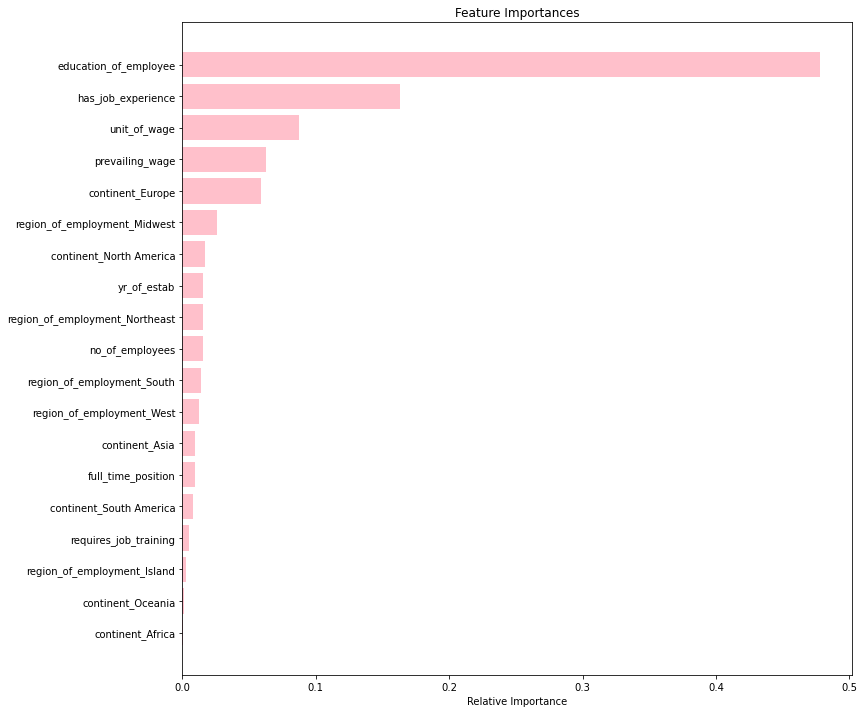

<IPython.core.display.Javascript object>

In [123]:
feature_names = X_train.columns
importances = gb_classifier.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="pink", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

- `education_of_employee` is the most important feature in visa certification, followed by `has_job_experience`, and `unit_of_wage`. 
- This is logical because the United States will want to certify visas for those who are highly educated and able to bring their expertise to the country. 

___
## Actionable Insights and Recommendations

### Revisiting Objectives:

The increasing number of applicants every year calls for a Machine Learning based solution that can help in shortlisting the candidates having higher chances of VISA approval. OFLC has hired your firm EasyVisa for data-driven solutions. You as a data scientist have to analyze the data provided and, with the help of a classification model:

* Facilitate the process of visa approvals.
* Recommend a suitable profile for the applicants for whom the visa should be certified or denied based on the drivers that significantly influence the case status. 

### Insights
- Based on the objectives outlined above, the factors that have the most significant influence on **`case_status`** are as follows; 
    - `education_of_employee` 
        - employees with more education were more likely to have their visa certified. 
    - `has_job_experience` 
        - employees with more job experience had an increased likelihood of visa certification. 
    - `unit_of_wage`
        - salaried employees were most likely to have their visa certified. 
    - `prevailing_wage`
        - those with a higher wage had increased chance of visa certification. 
    - `continent_Europe`
        - nearly 80% of visa applicants from Europe were able to recieve a visa. 
    - `region_of_employment_Midwest`
        - those employed in the Midwest had a higher chance of certification than any other region in the United States. 
    - `continent_north_america`
        - clients seeking visas from North America were not as likely to recieve their visa.
    - `region_of_employment_Northeast`
        - clients seeking employment in the Northeast were certified ~ 60% of the time. 
    - `no_of_employees`
        - the more employees a company has, the more likely the client seeking a visa will be certified. 
        ___
- The model was built to optimize F1 Score. `f1_score` should be maximized as the greater the F1 score, the higher the chances of reducing both False Negatives and False Positives and identifying both classes correctly.
  * f1_score is computed as
$$f1\_score = \frac{2 * Precision * Recall}{Precision + Recall}$$
- As stated in the objective statement, and earlier in the notebook; reducing false positives and false negatives means that the model will be able to accurately predict which candidates should and should not recieve a visa. Relying on other metrics would only reduce either false negatives, or false positives, and would not have been the best solution. 
- The gradient boost classifier did the best job at maximizing f1 score for both the training and testing data; therefore, I recommend the model used by EasyVisa should be the gradient boost classifier. 

### Recommendations
- The Office of Foreign Labor Certification (OFLC) seeks to give work visas to applicants they deem would bring value to the country. Companies in the United States want to hire hard-working, talented, and qualified individuals. The OFLC certifies visas for foreign workers on a case-by-case basis, with the intention of protecting US and foreign workers from lowered wages, or bad work conditions. Employers must demonstrate that there is a sufficient need for a visa to be certified. 
- With this in mind, high value talent should be prioritized when awarding visas. 
    - Education status is the most important factor in determining which clients will be awarded a visa. Those who possess a Master's and PHD should be certified more often than clients with only a high school diploma. 
    - The second most important indicator of visa certification is job experience. Attracting experienced professionals is of upmost importance, and those with more experience should be fast-tracked to visa certification. 
    - Salaried employees are most likely to be certified. This increases job productivity with the assumption that a salaried employee is working 40 hours/week. 
    - Nearly 80% of European applicants were selected for visa certification. The OFLC should also seek to increase the selection of those from other continents as well. 
    - Those seeking employment in the Midwest had their visas certified at a higher rate than other regions. The OFLC should seek to increase visa certification for other areas to attract high level talent to other parts of the United States as well. 
    - `no_of_employees` was positively correlated with `case_status` which suggests that the more employees a company employs, the more likely a visa will be certified. Logically, large companies need more workers to complete their business objectives. The OFLC should seek to continue offering visas to large companies, as they likely have more resources to meet OFLC criteria for visa certification. However, I would also recommend that the OFLC should look for ways to support smaller businesses who might be looking for talent outside of the United States. 
    
The three most important factors to determining if a visa will be certified or not are an employee's education, job experience, and their unit of wage. To hasten the process for visa certification, those who are highly educated, experienced, and able to work for a yearly salary should be shortlisted for faster turnover. Other clients who do not meet all three criteria should still be looked at, but they may have to wait a bit longer for their decision to be posted. 

___
Luise Hauptmann